In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# generate a simple, syntheic classification dataset

X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (500, 2)
Shape of y: (500,)


In [ ]:
X[:5]

array([[ 1.00845498, -1.04700975],
       [ 0.32602138,  0.50254097],
       [ 1.02420498, -1.79714286],
       [ 0.12188007,  1.05937142],
       [ 0.03909973,  0.38236937]])

In [ ]:
y[:5]

array([0, 1, 0, 0, 1])

In [ ]:
y

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,

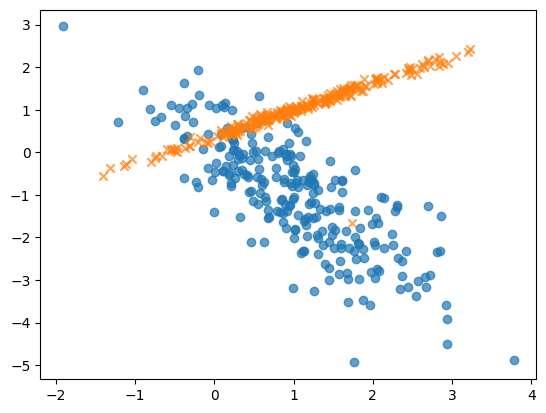

In [ ]:
plt.figure()
for label, marker in zip([0,1], ['o', 'x']):
  plt.scatter(
      X[y==label,0],
      X[y==label,1],
      marker=marker,
      label=f"Class {label}",
      alpha=0.7
  )

In [ ]:
# split the training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 400
Test set size: 100


In [ ]:
# create and train the model

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Model coeficient:", model.coef_)
print("Model intercept:", model.intercept_)


Model coeficient: [[0.25499708 2.16385589]]
Model intercept: [-0.61169411]


In [ ]:
print("X:", X[:1], "y:", y[:1])

X: [[ 1.00845498 -1.04700975]] y: [0]


In [ ]:
# Ensure `model` and test data are available. If not, try to recreate/train the model using existing variables.
try:
	y_pred = model.predict(X_test)
except NameError:
	# model or X_test not defined -> try to (re)create them using existing variables
	try:
		# If train/test splits are not available but X and y are, recreate them
		if 'X_train' not in globals() or 'X_test' not in globals() or 'y_train' not in globals() or 'y_test' not in globals():
			if 'X' in globals() and 'y' in globals():
				X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
			else:
				raise NameError("Required variables (X and y) are not defined. Run the earlier cells that create the dataset.") from None

		# If model is not available, create and train it
		if 'model' not in globals():
			model = LogisticRegression(random_state=42)
			model.fit(X_train, y_train)

		y_pred = model.predict(X_test)
	except NameError as e:
		# Propagate a clearer error message
		raise NameError(str(e)) from None

# compute metrics without shadowing imported functions
acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", acc)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

NameError: Required variables (model or X_train/X_test) are not defined. Run the earlier cells that create and train the model.